In [545]:
import pandas as pd
import seaborn as sns

In [546]:
epic='https://github.com/zhou-lab/InfiniumAnnotationV1/raw/main/Anno/EPIC/EPIC.hg38.manifest.tsv.gz'
df=pd.read_table(epic,index_col='Probe_ID',usecols=['Probe_ID','CpG_chrm','CpG_beg'])
df.dropna(inplace=True)
df['CpG_beg']=df['CpG_beg'].astype(int)

In [7]:
wb='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41169/matrix/GSE41169_series_matrix.txt.gz'
wb=pd.read_table(wb,skiprows=72,index_col=0)

In [281]:
wb_='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE112nnn/GSE112618/matrix/GSE112618_series_matrix.txt.gz'
wb=pd.read_table(wb_,skiprows=36+45,index_col=0)
wb.shape

(866092, 6)

In [547]:
%%time
#cd4='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/suppl/GSE56581_methylome_normalized.txt.gz'
t='data/cell/GSE56581_methylome_signal_intensities.txt'
cols=[0]+list(range(1,643,3))+list(range(2,643,3))
t=pd.read_table(t,index_col=0,usecols=cols)
cols=sorted(list(set(t.columns.str.split('.').str[0])))
for i in cols:
    t[i+'.methylated']=(t[i+'.methylated']/(t[i+'.methylated']+t[i+'.unmethylated']))
t=t[[c+'.methylated' for c in cols]].copy()
t.columns=[int(c) for c in cols]
t=t.clip(0,1)

CPU times: user 1min 9s, sys: 25.4 s, total: 1min 34s
Wall time: 1min 33s


In [555]:
age=pd.read_table('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/matrix/GSE56581_series_matrix.txt.gz',skiprows=40,
             index_col=0).iloc[10].str.strip('age (yrs): ').astype(int)

In [561]:
dg=t.T

In [563]:
dg['age']=age.values

In [ ]:
%%time
cor=dg.corrwith(dg['age'])

<Axes: >

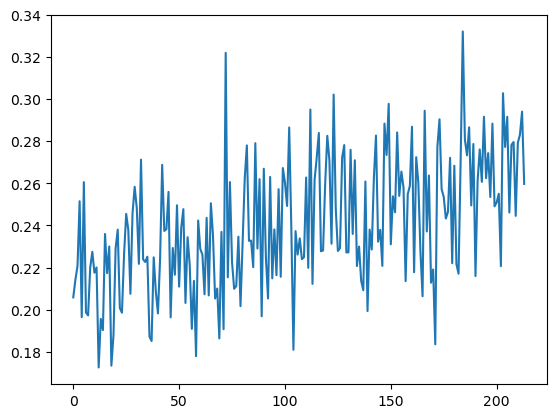

In [588]:
dg.sort_values('age').reset_index()['cg08097417'].plot()

In [591]:
cor.to_csv('~/cor.tmp')

In [592]:
wb=pd.read_csv('~/cor.tmp',index_col=0)

In [594]:
dg=wb.merge(cor.rename('t'),left_index=True,right_index=True)

In [601]:
dg.sort_values('0').tail(1000).sort_values('t')

,0,t
cg24838010,0.540222,-0.044530
cg07081770,0.513160,-0.039162
cg13449606,0.519126,-0.037643
cg01885071,0.517595,-0.023132
cg26046467,0.539595,-0.003472
...,...,...
cg08097417,0.782005,0.519338
cg22454769,0.833260,0.525220
cg14361627,0.746730,0.527299
cg06639320,0.821534,0.552191


In [ ]:
meta_='data/cell/GSE110554_series_matrix.txt'
meta=pd.read_table(meta_,index_col=0,skiprows=38,nrows=50).T.iloc[:,13].str.strip('cell type: ')

In [537]:
facs='data/cell/GSE110554_series_matrix.txt'
t=pd.read_table(facs,index_col=0,skiprows=97,nrows=10**6,usecols=['ID_REF']+list(meta[meta.str[-1]=='T'].index))
b=pd.read_table(facs,index_col=0,skiprows=97,nrows=10**6,usecols=['ID_REF']+list(meta[meta.str[-1]=='B'].index))
m=pd.read_table(facs,index_col=0,skiprows=97,nrows=10**6,usecols=['ID_REF']+list(meta[meta.str[-1]=='X'].index))

In [539]:
cells=pd.concat([t,b,m,wb],axis=1)

In [540]:
dg=df.merge(cells,left_index=True,right_index=True)
dg.shape

(865845, 37)

In [541]:
dic={
    'cd3':['chr11',118338567,118347289],
    'uba':['chr21',42403334,42406968],
    'spi':['chr19',50417036,50418551],
    'cd8':['chr11',2384205,2388112],
    'tcr':['chr14',22477660,22552794],
    'tcr':['chr7',	139098889,	139101878]
}

14
10


<Axes: >

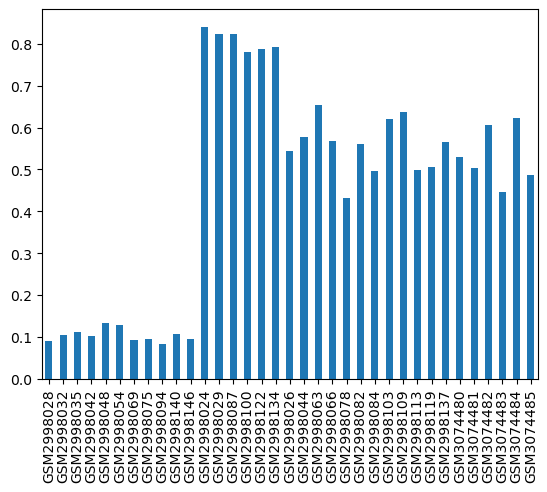

In [542]:
tl=[]
for region in ['cd3','uba']:
    region=dic[region]
    dl=df[(df['CpG_chrm']==region[0])&(df['CpG_beg']>=region[1])&(df['CpG_beg']<=region[2])].index.tolist()
    print(len(dl))
    tl=tl+ dl
dc=dg.loc[tl].drop(['CpG_chrm','CpG_beg'],axis=1).copy()
m1=dc.mean()
m1.plot(kind='bar')

In [544]:
dc.mean().tail(18).max()-dc.mean().tail(18).min()

0.2226512681249999

<Axes: >

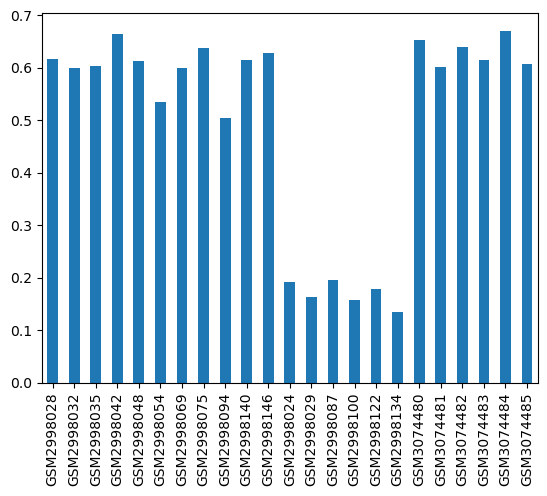

In [526]:
bl=[]
for region in ['spi','cd8']:
    region=dic[region]
    bl=bl+ df[(df['CpG_chrm']==region[0])&(df['CpG_beg']>=region[1])&(df['CpG_beg']<=region[2])].index.tolist()
dc=dg.loc[bl].drop(['CpG_chrm','CpG_beg'],axis=1).copy()
m2=dc.mean()
m2.plot(kind='bar')

In [527]:
conc.tail(6).mean()

0    0.623367
1    0.631254
dtype: float64

<Axes: xlabel='0', ylabel='1'>

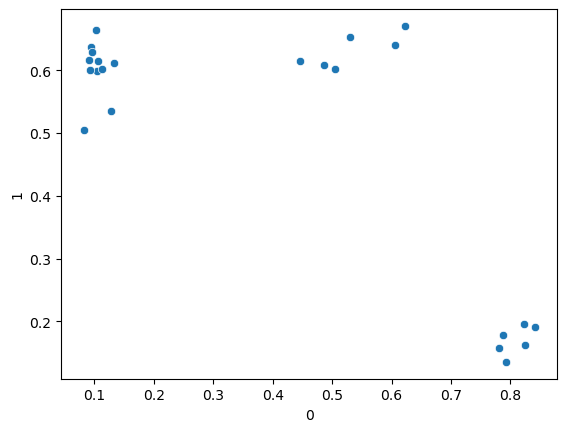

In [528]:
conc=pd.concat([m1,m2],axis=1)
sns.scatterplot(conc,x=0,y=1)

In [515]:
tmp=pd.read_table(meta_,index_col=0,skiprows=38,nrows=50).T.iloc[:,[13,20]]
tmp.columns=['p','c']

In [516]:
tmp[tmp.p.str[-1]=='T'].c.str.strip('purity: ').astype(int).mean()

94.9090909090909

In [517]:
conc.tail(6).max()-conc.tail(6).min()

0    0.120891
1    0.069019
dtype: float64

In [ ]:
conc=pd.concat([m1,m2],axis=1)
conc['type']=['T']*len(b.columns)+['WB']*len(t.columns)
sns.scatterplot(conc,x='m1',y='m2',hue='type')

In [514]:
nut='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63499/matrix/GSE63499_series_matrix.txt.gz'
nut=pd.read_table(nut,skiprows=65,index_col=0)

In [555]:
nu=nut[['GSM1551105','GSM1551106','GSM1551107','GSM1551109','GSM1551111','GSM1551108','GSM1551110','GSM1551112','GSM1551114','GSM1551116']].copy()

In [562]:
nu['nu']=nut[['GSM1551105','GSM1551106','GSM1551107','GSM1551109','GSM1551111']].mean(1)
nu['wb']=nut[['GSM1551108','GSM1551110','GSM1551112']].mean(1)

In [563]:
dg=df.merge(nu,left_index=True,right_index=True)

In [591]:
dc=dg[dg['CpG_chrm']=='chr7'][dg['CpG_beg']>=2076535].sort_values('CpG_beg').copy()
m1=dc[dc['CpG_beg']<=2077217].copy().drop(['CpG_chrm','CpG_beg'],axis=1)
#m1=pd.DataFrame(pd.concat([m1.mean(),wb.loc[m1.index].mean()]).rename('m1'))
m1.mean()

GSM1551105    0.270335
GSM1551106    0.235784
GSM1551107    0.269386
GSM1551109    0.306919
GSM1551111    0.190874
GSM1551108    0.548292
GSM1551110    0.636637
GSM1551112    0.450762
GSM1551114    0.454667
GSM1551116    0.465153
nu            0.254660
wb            0.545231
dtype: float64

In [593]:
dc=dg[dg['CpG_chrm']=='chr16'][dg['CpG_beg']>=88839895].sort_values('CpG_beg').copy()
m1=dc[dc['CpG_beg']<=88841054].copy().drop(['CpG_chrm','CpG_beg'],axis=1)
#m1=pd.DataFrame(pd.concat([m1.mean(),wb.loc[m1.index].mean()]).rename('m1'))
m1.mean()

/tmp/ipykernel_18223/3893985181.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc=dg[dg['CpG_chrm']=='chr16'][dg['CpG_beg']>=88839895].sort_values('CpG_beg').copy()


GSM1551105    0.296266
GSM1551106    0.239133
GSM1551107    0.291441
GSM1551109    0.280689
GSM1551111    0.171143
GSM1551108    0.416473
GSM1551110    0.506457
GSM1551112    0.383564
GSM1551114    0.390712
GSM1551116    0.406597
nu            0.255734
wb            0.435498
dtype: float64

In [ ]:
mus_='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE50nnn/GSE50498/matrix/GSE50498_series_matrix.txt.gz'
age=pd.read_table(mus_,skiprows=40,nrows=50,index_col=0).iloc[8].str.strip('age: ').astype(float)

In [ ]:
mus=pd.read_table(mus_,skiprows=40+36,index_col=0)

In [807]:
%%time
mus_t=mus.T
mus_t['age']=age.values
mus_cor=mus_t.corrwith(mus_t['age'])

CPU times: user 2min 1s, sys: 1.42 s, total: 2min 2s
Wall time: 2min 2s


In [810]:
mus_cor.sort_values()

ID_REF
cg22115892                 -0.934157
cg18584803                 -0.925474
cg07917901                 -0.921992
cg00001854                 -0.921887
cg04570540                 -0.921604
                              ...   
cg22454769                  0.928315
cg00702638                  0.937200
cg04880546                  0.942104
age                         1.000000
!series_matrix_table_end         NaN
Length: 485579, dtype: float64

In [811]:
dg=dg.merge(mus_cor.rename('mus'),left_index=True,right_index=True)

In [842]:
dg['whole blood']=dg['0']
dg['muscle']=dg['mus']

In [846]:
pl

,whole blood,t,liver,muscle
cg13848598,0.650996,0.355561,0.645946,0.687787
cg14639163,0.651630,0.284758,0.248998,-0.197901
cg07178825,0.651776,0.328716,0.543989,0.639652
cg11220950,0.651914,0.412901,0.685985,0.527178
cg17326555,0.652037,0.308107,0.489900,0.665434
...,...,...,...,...
cg08160331,0.812023,0.401585,0.745121,0.547049
cg06639320,0.821534,0.552191,0.733451,0.844856
cg22454769,0.833260,0.525220,0.697752,0.928315
cg07553761,0.861937,0.315915,0.866529,0.907805


<Axes: >

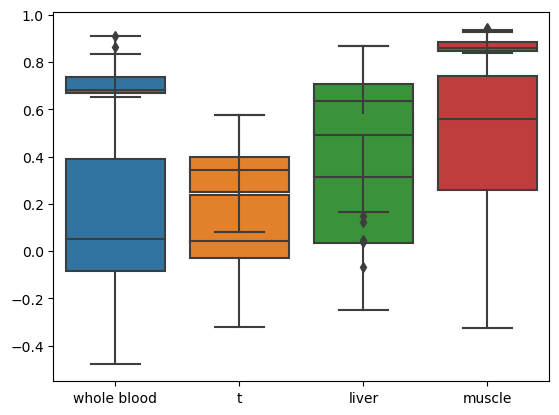

In [845]:
pl=dg[['whole blood','t','liver','muscle']].sort_values('muscle').tail(100)
sns.boxplot(pl)
pl=dg[['whole blood','t','liver','muscle']].sort_values('whole blood').tail(100)
sns.boxplot(pl)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'liver'}>,
        <Axes: title={'center': 'mus'}>]], dtype=object)

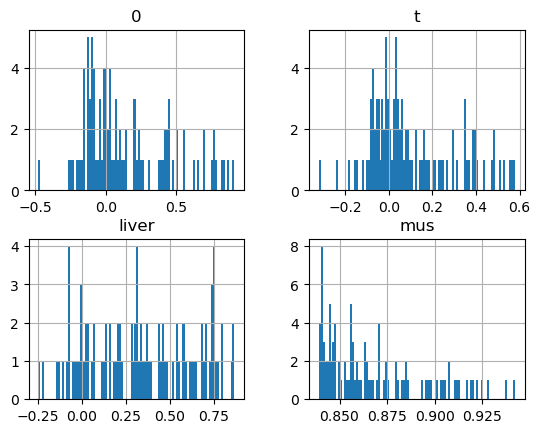

In [825]:
dg[['0','t','liver','mus']].sort_values('mus').tail(100).hist(bins=100)

In [ ]:
dg=df.merge(mono,left_index=True,right_index=True)
dc=dg[dg['CpG_chrm']=='chr14'].sort_values('CpG_beg')
dc[dc['CpG_beg']>=22479508][dc['CpG_beg']<=22513795].mean()